# Assignment 5 CNN Model

## Renaming all the files to standardise and easy of labling

In [18]:
# Renaming all the file in all folders for easy of labling
import os
 
# Function to rename the files
def main():
   
    folder = "Data/test/without_mask"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"without_mask_ {str(count+10000)}.jpg"
        src =f"{folder}/{filename}"  
        dst =f"{folder}/{dst}"
        os.rename(src, dst)
# Driver Code
if __name__ == '__main__':
    main()

#### Moving all the file into one folder

In [56]:
# Move all image files into one folder "model_data"
import shutil
import os
  
# Define the source and destination path
source = "Data/test/with_mask"
destination = "Data/model_data/with_mask"
  
# code to move the files from sub-folder to main folder.
files = os.listdir(source)
for file in files:
    file_name = os.path.join(source, file)
    shutil.move(file_name, destination)
print("Files Moved")

Files Moved


#### Importing necessary libraries

In [1]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, Flatten

In [2]:

dataset = "Data/model_data"
imagePaths=list(paths.list_images(dataset))
imagePaths

['Data/model_data\\without_mask\\without_mask_ 0.jpg',
 'Data/model_data\\without_mask\\without_mask_ 1.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10.jpg',
 'Data/model_data\\without_mask\\without_mask_ 100.jpg',
 'Data/model_data\\without_mask\\without_mask_ 1000.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10000.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10001.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10002.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10003.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10004.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10005.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10006.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10007.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10008.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10009.jpg',
 'Data/model_data\\without_mask\\without_mask_ 1001.jpg',
 'Data/model_data\\without_mask\\without_mask_ 10010.jpg',
 'Data/model

### Inspect the image sizes and get the mean size to apply to model

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
from tensorflow.keras.callbacks import EarlyStopping
height=[]
width=[]
for image in os.listdir("Data/model_data/with_mask"):
    image = imread("Data/model_data/with_mask/" + image)
    h, w, colors = image.shape
    height.append(h)
    width.append(w)

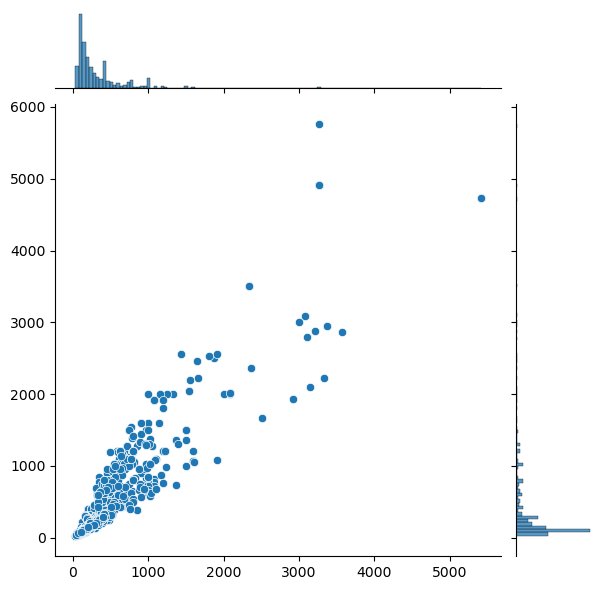

In [4]:
sns.jointplot(x=height, y=width)
plt.show()

In [5]:
np.mean(height)

346.0422670509126

In [6]:
np.mean(width)

351.26849183477424

### Apply labels to each image file

In [7]:
# Split labels from filenames
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image = load_img(i,target_size=(345,345))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
data = np.array(data,dtype='float32')
labels = np.array(labels)

In [9]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [10]:
# Binarize the labels
lb=LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [11]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Split the data into test and train

In [12]:
## Splitting of Data

train_X,test_X,train_Y,test_Y = train_test_split(data,labels,test_size=0.20,random_state=10,stratify=labels)

In [13]:
train_X

array([[[[-0.8666667 , -0.8745098 , -0.8901961 ],
         [-0.8666667 , -0.8745098 , -0.8901961 ],
         [-0.8666667 , -0.8745098 , -0.8901961 ],
         ...,
         [ 0.6627451 ,  0.70980394,  0.70980394],
         [ 0.6627451 ,  0.70980394,  0.70980394],
         [ 0.6627451 ,  0.70980394,  0.70980394]],

        [[-0.8666667 , -0.8745098 , -0.8901961 ],
         [-0.8666667 , -0.8745098 , -0.8901961 ],
         [-0.8666667 , -0.8745098 , -0.8901961 ],
         ...,
         [ 0.6627451 ,  0.70980394,  0.70980394],
         [ 0.6627451 ,  0.70980394,  0.70980394],
         [ 0.6627451 ,  0.70980394,  0.70980394]],

        [[-0.88235295, -0.8901961 , -0.90588236],
         [-0.88235295, -0.8901961 , -0.90588236],
         [-0.88235295, -0.8901961 , -0.90588236],
         ...,
         [ 0.6313726 ,  0.6784314 ,  0.6784314 ],
         [ 0.6313726 ,  0.6784314 ,  0.6784314 ],
         [ 0.6313726 ,  0.6784314 ,  0.6784314 ]],

        ...,

        [[-0.9607843 , -0.99215686, -1

In [14]:
train_Y.size

6662

In [38]:
test_Y.size

1666

In [39]:
aug=ImageDataGenerator(
                       rotation_range=20,
                       zoom_range=0.1,width_shift_range=0.1,
                       height_shift_range=0.1,shear_range=0.1,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='nearest'
                       )
     

In [40]:
input_shape = (345,345,3)

In [48]:
# Build Model
model=Sequential()
input_image = Input(shape=input_shape)
# 1st Conv layer
model = Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape)(input_image)
model = MaxPooling2D((2, 2),padding='same')(model)
# 2nd Conv layer
model = Conv2D(64, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 3rd Conv layer
model = Conv2D(64, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 4th Conv layer
model = Conv2D(128, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 5th Conv layer
#model = Conv2D(256, (3, 3), activation='relu', padding='same')(model)
#model = MaxPooling2D((2, 2),padding='same')(model)
# FC layers
model = Flatten()(model)
model = Dense(128)(model)
model = Dropout(0.2)(model)
model = Dense(64)(model)
model = Dropout(0.2)(model)
model = Dense(32)(model)
model = Dropout(0.2)(model)

output= Dense(2, activation='softmax')(model)
model = Model(inputs=[input_image], outputs=[output])

In [49]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 345, 345, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 345, 345, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 173, 173, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 173, 173, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 87, 87, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 87, 87, 64)        3692

In [50]:
lr=0.0005
Epochs=5
BS=32
early_stop = EarlyStopping(monitor='val_loss', patience=2)
opt=Adam(learning_rate=lr,decay=lr/Epochs)

In [51]:

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

## Training the Model

In [52]:

history=model.fit(
aug.flow(train_X,train_Y,batch_size=BS),
steps_per_epoch=len(train_X)//BS,
validation_data=(test_X,test_Y),
validation_steps=len(test_X)//BS,
epochs=Epochs
# ,callbacks=[early_stop]    
)

Epoch 1/5
104/104 [==============================] - 175s 2s/step - loss: 0.4544 - accuracy: 0.8196 - val_loss: 0.2793 - val_accuracy: 0.8788
Epoch 2/5
104/104 [==============================] - 187s 2s/step - loss: 0.3352 - accuracy: 0.8797 - val_loss: 0.2503 - val_accuracy: 0.9088
Epoch 3/5
104/104 [==============================] - 202s 2s/step - loss: 0.3088 - accuracy: 0.8878 - val_loss: 0.3145 - val_accuracy: 0.8848
Epoch 4/5
104/104 [==============================] - 277s 3s/step - loss: 0.2918 - accuracy: 0.8997 - val_loss: 0.1909 - val_accuracy: 0.9436
Epoch 5/5
104/104 [==============================] - 180s 2s/step - loss: 0.2516 - accuracy: 0.9121 - val_loss: 0.1708 - val_accuracy: 0.9484


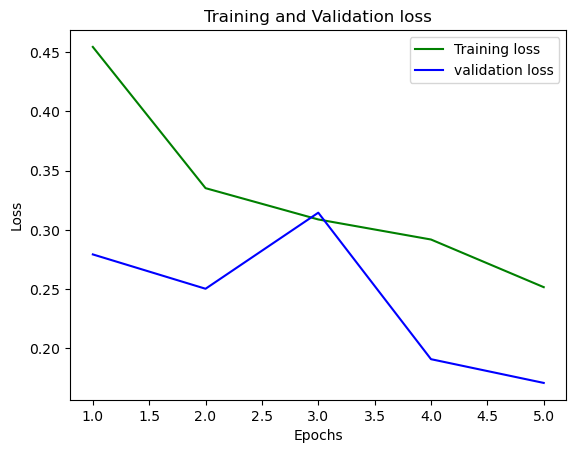

In [54]:

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

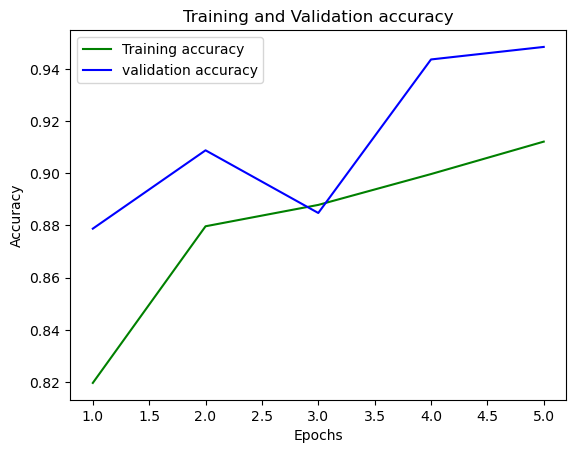

In [55]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

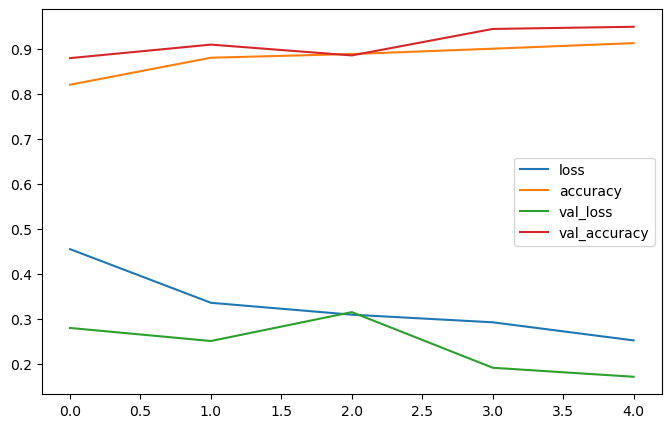

In [56]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

## Save Model and Test Model

In [57]:
model.save('face_mask_detection.h5')

In [58]:
from tensorflow.keras.models import load_model
model = load_model("face_mask_detection.h5")
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))
     

27/27 [==============================] - 14s 516ms/step
              precision    recall  f1-score   support

   with_mask       0.97      0.93      0.95       417
without_mask       0.93      0.97      0.95       416

    accuracy                           0.95       833
   macro avg       0.95      0.95      0.95       833
weighted avg       0.95      0.95      0.95       833



### The End!